In [1]:
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
#os.chdir(os.path.abspath("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_tau import fit_single_exp, func_single_exp, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [2]:
dataset_folder = project_folder_path + 'results\\allen_mice\\dataset\\cut_30min\\'
fig_folder = project_folder_path + 'results\\allen_mice\\fig_draft_paper\\'

#### Load data

In [3]:
units_info_df = pd.read_pickle(dataset_folder + 'sua_list_constrained_units_df.pkl')
units_info_df_subset = units_info_df[['unit_id', 'ecephys_structure_acronym']].copy()
units_info_df_subset.head(2)

,unit_id,ecephys_structure_acronym
66,950913540,VISam
67,950915005,VISam


In [4]:
acf_full_df_file = dataset_folder + 'binned\\acf\\acf_full_50ms_20lags_df.pkl'
acf_full_df = pd.read_pickle(acf_full_df_file)

acf_isttc_full_df_file = dataset_folder + 'non_binned\\acf\\acf_isttc_full_50ms_20lags_df.pkl'
acf_isttc_full_df = pd.read_pickle(acf_isttc_full_df_file)

#### Calculate tau per unit

In [5]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']


In [ ]:
acf_full_2d = acf_full_df[acf_cols].values
print(f'acf_2d shape {acf_full_2d.shape}')
acf_full_unit_ids = acf_full_df['unit_id'].values
print(f'acf_full_unit_ids shape {acf_full_unit_ids.shape}')

acf_full_dict = {}
for unit_id_idx, unit_id in enumerate(acf_full_unit_ids):
    if unit_id_idx % 100 == 0:
        print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(acf_full_unit_ids)}, {datetime.now()}')
    fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_full_2d[unit_id_idx,:],
                                                                              start_idx_=1, exp_fun_=func_single_exp_monkey)
    taus = {'tau':tau,
            'tau_lower':tau_ci[0],
            'tau_upper':tau_ci[1],
            'fit_r_squared': fit_r_squared,
            'explained_var': explained_var,
            'popt': fit_popt,
            'pcov': fit_pcov,
            'log_message': log_message}
    acf_full_dict[unit_id] = {'taus': taus,
                              'acf': acf_full_2d[unit_id_idx,:]}

In [ ]:
isttc_full_2d = acf_isttc_full_df[acf_cols].values
print(f'isttc_full_2d shape {isttc_full_2d.shape}')
isttc_full_unit_ids = acf_isttc_full_df['unit_id'].values
print(f'isttc_full_unit_ids shape {isttc_full_unit_ids.shape}')

isttc_full_dict = {}
for unit_id_idx, unit_id in enumerate(isttc_full_unit_ids):
    if unit_id_idx % 1000 == 0:
        print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(isttc_full_unit_ids)}, {datetime.now()}')
    fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(isttc_full_2d[unit_id_idx,:],
                                                                              start_idx_=1, exp_fun_=func_single_exp_monkey)
    taus = {'tau':tau,
            'tau_lower':tau_ci[0],
            'tau_upper':tau_ci[1],
            'fit_r_squared': fit_r_squared,
            'explained_var': explained_var,
            'popt': fit_popt,
            'pcov': fit_pcov,
            'log_message': log_message}
    isttc_full_dict[unit_id] = {'taus': taus,
                                'acf': isttc_full_2d[unit_id_idx,:]}

In [ ]:
with open(dataset_folder + 'non_binned\\acf\\acf_isttc_full_50ms_20lags_dict.pkl', "wb") as f:
    pickle.dump(isttc_full_dict, f)

In [ ]:
with open(dataset_folder + 'binned\\acf\\acf_full_50ms_20lags_dict.pkl', "wb") as f:
    pickle.dump(acf_full_dict, f)

#### Load calculated taus

In [7]:
with open(dataset_folder + 'non_binned\\acf\\acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(dataset_folder + 'binned\\acf\\acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

with open(dataset_folder + 'binned\\acf\\pearsonr_trial_avg_50ms_20lags_dict.pkl', "rb") as f:
    pearsonr_trial_avg_dict = pickle.load(f)

with open(dataset_folder + 'non_binned\\acf\\sttc_trial_avg_50ms_20lags_dict_0_1000.pkl', "rb") as f:
    sttc_trial_avg_dict = pickle.load(f)

with open(dataset_folder + 'non_binned\\acf\\sttc_trial_concat_50ms_20lags_dict.pkl', "rb") as f:
    sttc_trial_concat_dict = pickle.load(f)

In [9]:
print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')
print(f'len pearsonr_trial_avg_dict {len(pearsonr_trial_avg_dict)}')
print(f'len sttc_trial_avg_dict {len(sttc_trial_avg_dict)}')
print(f'len sttc_trial_concat_dict {len(sttc_trial_concat_dict)}')

len isttc_full_dict 5775
len acf_full_dict 5775
len pearsonr_trial_avg_dict 5775
len sttc_trial_avg_dict 1000
len sttc_trial_concat_dict 5775


#### Prep data for plots

In [20]:
def calculate_acf_decline_flag(acf_, start_idx=3, end_idx=5):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [63]:
data = []
for unit_id, unit_data in acf_full_dict.items():
    taus = unit_data['taus']  
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf']),
        'decline_100_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=5)
    })
acf_full_plot_df = pd.DataFrame(data)
acf_full_plot_df['method'] = 'acf_full'
acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
acf_full_plot_df = acf_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
acf_full_plot_df.head(10)

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym
0,950913540,0.580319,3.365490e-01,8.240880e-01,9.361658e-01,True,False,acf_full,2.901593e+01,VISam
1,950915005,0.034201,3.420111e-02,3.420111e-02,-5.534868e-10,True,False,acf_full,1.710055e+00,VISam
2,950915018,0.037646,3.764569e-02,3.764569e-02,-2.423335e-10,False,False,acf_full,1.882284e+00,VISam
3,950913798,0.022190,2.218997e-02,2.218997e-02,-2.805223e-10,False,False,acf_full,1.109498e+00,VISam
4,950915049,0.025056,2.505569e-02,2.505569e-02,-3.396461e-11,False,False,acf_full,1.252785e+00,VISam
5,950913944,6.892935,6.262411e+00,7.523458e+00,9.968823e-01,True,True,acf_full,3.446467e+02,VISam
6,950913961,68518.000388,-4.888652e+08,4.890023e+08,7.475119e-01,False,False,acf_full,3.425900e+06,VISam
7,950913991,0.040627,-3.435218e+07,3.435218e+07,-3.705791e-11,True,True,acf_full,2.031341e+00,VISam
8,950913984,8.470514,7.013852e+00,9.927176e+00,9.918832e-01,True,True,acf_full,4.235257e+02,VISam
9,950915073,3.018096,1.386233e+00,4.649959e+00,8.158901e-01,False,False,acf_full,1.509048e+02,VISam


In [64]:
data = []
for unit_id, unit_data in isttc_full_dict.items():
    taus = unit_data['taus']      
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf']),
        'decline_100_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=5)
    })
acf_isttc_full_plot_df = pd.DataFrame(data)
acf_isttc_full_plot_df['method'] = 'isttc_full'
acf_isttc_full_plot_df['tau_ms'] = acf_isttc_full_plot_df['tau'] * 50
acf_isttc_full_plot_df = acf_isttc_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
acf_isttc_full_plot_df.head(10)

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym
0,950913540,0.480634,2.827016e-01,6.785660e-01,9.566893e-01,True,True,isttc_full,2.403169e+01,VISam
1,950915005,0.016986,1.698587e-02,1.698587e-02,-3.143068e-10,True,False,isttc_full,8.492934e-01,VISam
2,950915018,0.018591,1.859093e-02,1.859093e-02,-2.220446e-16,False,False,isttc_full,9.295463e-01,VISam
3,950913798,0.009842,9.841583e-03,9.841583e-03,-1.244016e-10,False,False,isttc_full,4.920792e-01,VISam
4,950915049,0.015463,1.546313e-02,1.546313e-02,-2.220446e-16,True,False,isttc_full,7.731563e-01,VISam
5,950913944,8.010364,7.412793e+00,8.607934e+00,9.983261e-01,True,True,isttc_full,4.005182e+02,VISam
6,950913961,78189.066362,-4.365115e+08,4.366679e+08,7.746628e-01,False,False,isttc_full,3.909453e+06,VISam
7,950913991,0.037963,3.796291e-02,3.796291e-02,-1.767142e-11,True,False,isttc_full,1.898145e+00,VISam
8,950913984,9.785418,8.158991e+00,1.141184e+01,9.939657e-01,True,True,isttc_full,4.892709e+02,VISam
9,950915073,5.075232,-2.502886e+00,1.265335e+01,4.539619e-01,True,True,isttc_full,2.537616e+02,VISam


In [67]:
data = []
for unit_id, unit_data in pearsonr_trial_avg_dict.items():
    taus = unit_data['taus']  
    acf = unit_data['acf']  
    data.append({
        'unit_id': unit_id,
        'tau': np.nanmedian([d['tau'] for d in taus]),
        'fit_r_squared': np.nanmedian([d['fit_r_squared'] for d in taus]),
        'decline_150_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0)),
        'decline_100_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0), start_idx=2, end_idx=5)
    })
acf_pearsontr_trial_avg_plot_df = pd.DataFrame(data)
acf_pearsontr_trial_avg_plot_df['method'] = 'pearsonr_trial_avg'
acf_pearsontr_trial_avg_plot_df['tau_ms'] = acf_pearsontr_trial_avg_plot_df['tau'] * 50
acf_pearsontr_trial_avg_plot_df = acf_pearsontr_trial_avg_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
acf_pearsontr_trial_avg_plot_df.head(10) 

C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2559461909.py:7: RuntimeWarning: All-NaN slice encountered
  'tau': np.nanmedian([d['tau'] for d in taus]),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2559461909.py:8: RuntimeWarning: All-NaN slice encountered
  'fit_r_squared': np.nanmedian([d['fit_r_squared'] for d in taus]),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2559461909.py:9: RuntimeWarning: Mean of empty slice
  'decline_150_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0)),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2559461909.py:10: RuntimeWarning: Mean of empty slice
  'decline_100_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0), start_idx=2, end_idx=5)


,unit_id,tau,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym
0,950913540,0.688400,2.583109e-01,True,False,pearsonr_trial_avg,34.419997,VISam
1,950915005,0.027362,-1.057593e-10,True,False,pearsonr_trial_avg,1.368080,VISam
2,950915018,0.037051,-1.360825e-10,False,False,pearsonr_trial_avg,1.852533,VISam
3,950913798,0.032740,-7.043599e-11,False,False,pearsonr_trial_avg,1.636980,VISam
4,950915049,0.047382,-3.813505e-11,True,False,pearsonr_trial_avg,2.369102,VISam
5,950913944,6.406799,7.283790e-01,True,True,pearsonr_trial_avg,320.339971,VISam
6,950913961,0.053365,-2.975398e-14,False,False,pearsonr_trial_avg,2.668253,VISam
7,950913991,0.033230,-9.671486e-11,True,True,pearsonr_trial_avg,1.661484,VISam
8,950913984,8.267166,4.067477e-01,True,True,pearsonr_trial_avg,413.358315,VISam
9,950915073,0.958079,3.737347e-02,False,False,pearsonr_trial_avg,47.903953,VISam


In [68]:
data = []
for unit_id, unit_data in sttc_trial_avg_dict.items():
    taus = unit_data['taus']  
    acf = unit_data['acf']  
    data.append({
        'unit_id': unit_id,
        'tau': np.nanmedian([d['tau'] for d in taus]),
        'fit_r_squared': np.nanmedian([d['fit_r_squared'] for d in taus]),
        'decline_150_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0)),
        'decline_100_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0), start_idx=2, end_idx=5)
    })
acf_sttc_trial_avg_plot_df = pd.DataFrame(data)
acf_sttc_trial_avg_plot_df['method'] = 'sttc_trial_avg'
acf_sttc_trial_avg_plot_df['tau_ms'] = acf_sttc_trial_avg_plot_df['tau'] * 50
acf_sttc_trial_avg_plot_df = acf_sttc_trial_avg_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
acf_sttc_trial_avg_plot_df.head(10) 

,unit_id,tau,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym
0,950913540,0.631610,2.721920e-01,True,False,sttc_trial_avg,31.580521,VISam
1,950915005,0.028969,-1.101822e-10,True,False,sttc_trial_avg,1.448429,VISam
2,950915018,0.039046,-1.079059e-10,False,False,sttc_trial_avg,1.952291,VISam
3,950913798,0.037205,-1.550138e-10,False,False,sttc_trial_avg,1.860244,VISam
4,950915049,0.046316,-7.835865e-11,False,False,sttc_trial_avg,2.315802,VISam
5,950913944,6.648607,7.539186e-01,True,True,sttc_trial_avg,332.430335,VISam
6,950913961,0.046250,-6.921241e-12,False,False,sttc_trial_avg,2.312477,VISam
7,950913991,0.035405,-2.891930e-10,True,True,sttc_trial_avg,1.770242,VISam
8,950913984,8.346457,3.576384e-01,True,True,sttc_trial_avg,417.322863,VISam
9,950915073,0.713028,2.856923e-02,False,False,sttc_trial_avg,35.651410,VISam


In [69]:
data = []
for unit_id, unit_data in sttc_trial_concat_dict.items():
    taus = unit_data['taus']  
    acf = unit_data['acf']  
    data.append({
        'unit_id': unit_id,
        'tau': np.nanmedian([d['tau'] for d in taus]),
        'fit_r_squared': np.nanmedian([d['fit_r_squared'] for d in taus]),
        'decline_150_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0)),
        'decline_100_250': calculate_acf_decline_flag(np.nanmean(acf, axis=0), start_idx=2, end_idx=5)
    })
acf_sttc_trial_concat_plot_df = pd.DataFrame(data)
acf_sttc_trial_concat_plot_df['method'] = 'sttc_trial_concat'
acf_sttc_trial_concat_plot_df['tau_ms'] = acf_sttc_trial_concat_plot_df['tau'] * 50
acf_sttc_trial_concat_plot_df = acf_sttc_trial_concat_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
acf_sttc_trial_concat_plot_df.head(10) 

,unit_id,tau,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym
0,950913540,0.432353,4.972285e-01,True,True,sttc_trial_concat,21.617661,VISam
1,950915005,0.029208,-9.536372e-11,True,False,sttc_trial_concat,1.460417,VISam
2,950915018,0.034565,-1.248419e-10,False,False,sttc_trial_concat,1.728268,VISam
3,950913798,0.020849,-9.131740e-11,False,False,sttc_trial_concat,1.042449,VISam
4,950915049,0.051150,0.000000e+00,True,False,sttc_trial_concat,2.557524,VISam
5,950913944,7.659492,8.304520e-01,True,True,sttc_trial_concat,382.974596,VISam
6,950913961,0.103466,2.860163e-03,True,False,sttc_trial_concat,5.173310,VISam
7,950913991,0.027030,-4.301104e-11,True,False,sttc_trial_concat,1.351514,VISam
8,950913984,12.687353,5.483654e-01,True,True,sttc_trial_concat,634.367640,VISam
9,950915073,0.321996,3.443235e-03,True,True,sttc_trial_concat,16.099807,VISam


In [70]:
summary_df = pd.concat([acf_full_plot_df, 
                        acf_isttc_full_plot_df, 
                        acf_pearsontr_trial_avg_plot_df, 
                        acf_sttc_trial_avg_plot_df, 
                        acf_sttc_trial_concat_plot_df])
summary_df.reset_index(inplace=True, drop=True)
summary_df['tau_ms_log10'] = np.log10(summary_df['tau_ms'])
summary_df.head(3)

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym,tau_ms_log10
0,950913540,0.580319,0.336549,0.824088,9.361658e-01,True,False,acf_full,29.015926,VISam,1.462636
1,950915005,0.034201,0.034201,0.034201,-5.534868e-10,True,False,acf_full,1.710055,VISam,0.233010
2,950915018,0.037646,0.037646,0.037646,-2.423335e-10,False,False,acf_full,1.882284,VISam,0.274685


In [73]:
total_counts_df = summary_df.groupby('method', as_index=False)['decline_150_250'].count()
total_counts_df.rename(columns={'decline_150_250': 'total_count'}, inplace=True)

units_count_df = summary_df.groupby('method', as_index=False)['decline_150_250'].sum()
units_count_df.rename(columns={'decline_150_250': 'true_count_150_250'}, inplace=True)

units_acf_decline_df = pd.merge(units_count_df, total_counts_df, on='method')
units_acf_decline_df = pd.merge(units_acf_decline_df, units_count_df2, on='method')
units_acf_decline_df['percentage'] = (units_acf_decline_df['true_count_150_250'] / units_acf_decline_df['total_count']) * 100

units_acf_decline_df

,method,true_count_150_250,total_count,true_count_100_250,percentage
0,acf_full,5041,5775,3940,87.290043
1,isttc_full,5149,5775,3842,89.160173
2,pearsonr_trial_avg,4984,5775,3816,86.303030
3,sttc_trial_avg,862,1000,669,86.200000
4,sttc_trial_concat,5081,5775,3764,87.982684


In [47]:
total_counts_per_area_df = summary_df.groupby(by=['method','ecephys_structure_acronym'], as_index=False)['decline_150_250'].count()
total_counts_per_area_df.rename(columns={'decline_150_250': 'total_count'}, inplace=True)

units_count_per_area_df = summary_df.groupby(by=['method','ecephys_structure_acronym'], as_index=False)['decline_150_250'].sum()
units_count_per_area_df.rename(columns={'decline_150_250': 'true_count'}, inplace=True)

units_acf_decline_per_area_df = pd.merge(total_counts_per_area_df, units_count_per_area_df, on=['method','ecephys_structure_acronym'])
units_acf_decline_per_area_df['percentage'] = (units_acf_decline_per_area_df['true_count'] / units_acf_decline_per_area_df['total_count']) * 100

units_acf_decline_per_area_df

,method,ecephys_structure_acronym,total_count,true_count,percentage
0,acf_full,LGd,254,214,84.251969
1,acf_full,LP,599,543,90.651085
2,acf_full,VISal,928,798,85.991379
3,acf_full,VISam,912,752,82.456140
4,acf_full,VISl,727,662,91.059147
5,acf_full,VISp,1063,938,88.240828
6,acf_full,VISpm,586,490,83.617747
7,acf_full,VISrl,706,644,91.218130
8,isttc_full,LGd,254,218,85.826772
9,isttc_full,LP,599,554,92.487479


#### Plots

##### Taus

In [50]:
color_acf_full = '#4783B4'
color_isttc_full = '#E2552A'
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' 
color_sttc_trail_concat = '#B94E48' 

colors=[color_acf_full, color_isttc_full, color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat]

brain_areas_axes_ticks = ['LGd', 'VISp', 'VISl', 'VISrl', 'LP', 'VISal', 'VISpm', 'VISam']
brain_areas_names = ['LGN', 'V1', 'LM', 'RL', 'LP', 'AL', 'PM', 'AM']

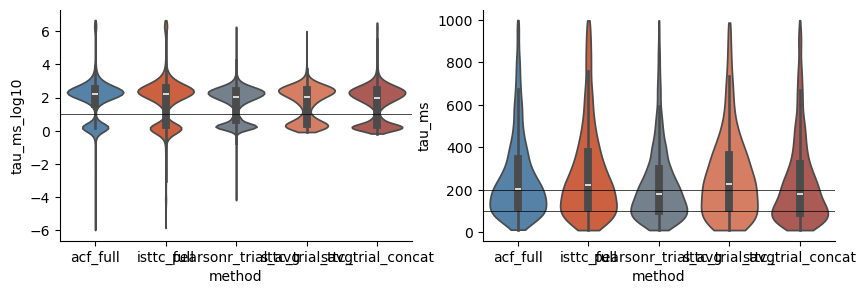

In [55]:
fig, axes = plt.subplots(1,2, figsize=(10, 3))

sns.violinplot(ax=axes[0], x='method', y='tau_ms_log10', hue='method', data=summary_df, cut=0,  density_norm='width', palette=colors, legend=False)
sns.violinplot(ax=axes[1], x='method', y='tau_ms', hue='method', 
               data=summary_df.query('tau_ms <= 1000 and tau_ms > 10'), cut=0,  density_norm='width', palette=colors)

axes[0].axhline(y=np.log10(10), lw=0.5, color='k')
axes[1].axhline(y=100, lw=0.5, color='k')
axes[1].axhline(y=200, lw=0.5, color='k')

sns.despine()

In [74]:
summary_df

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,decline_100_250,method,tau_ms,ecephys_structure_acronym,tau_ms_log10
0,950913540,0.580319,0.336549,0.824088,9.361658e-01,True,False,acf_full,29.015926,VISam,1.462636
1,950915005,0.034201,0.034201,0.034201,-5.534868e-10,True,False,acf_full,1.710055,VISam,0.233010
2,950915018,0.037646,0.037646,0.037646,-2.423335e-10,False,False,acf_full,1.882284,VISam,0.274685
3,950913798,0.022190,0.022190,0.022190,-2.805223e-10,False,False,acf_full,1.109498,VISam,0.045127
4,950915049,0.025056,0.025056,0.025056,-3.396461e-11,False,False,acf_full,1.252785,VISam,0.097876
...,...,...,...,...,...,...,...,...,...,...,...
24095,951190507,3.392233,NaN,NaN,1.749204e-01,True,False,sttc_trial_concat,169.611636,VISrl,2.229456
24096,951190510,0.037139,NaN,NaN,-6.425149e-11,False,False,sttc_trial_concat,1.856970,VISrl,0.268805
24097,951190529,0.027906,NaN,NaN,-1.553889e-10,True,False,sttc_trial_concat,1.395287,VISrl,0.144664
24098,951190848,0.820837,NaN,NaN,3.474313e-01,True,True,sttc_trial_concat,41.041828,VISrl,1.613227


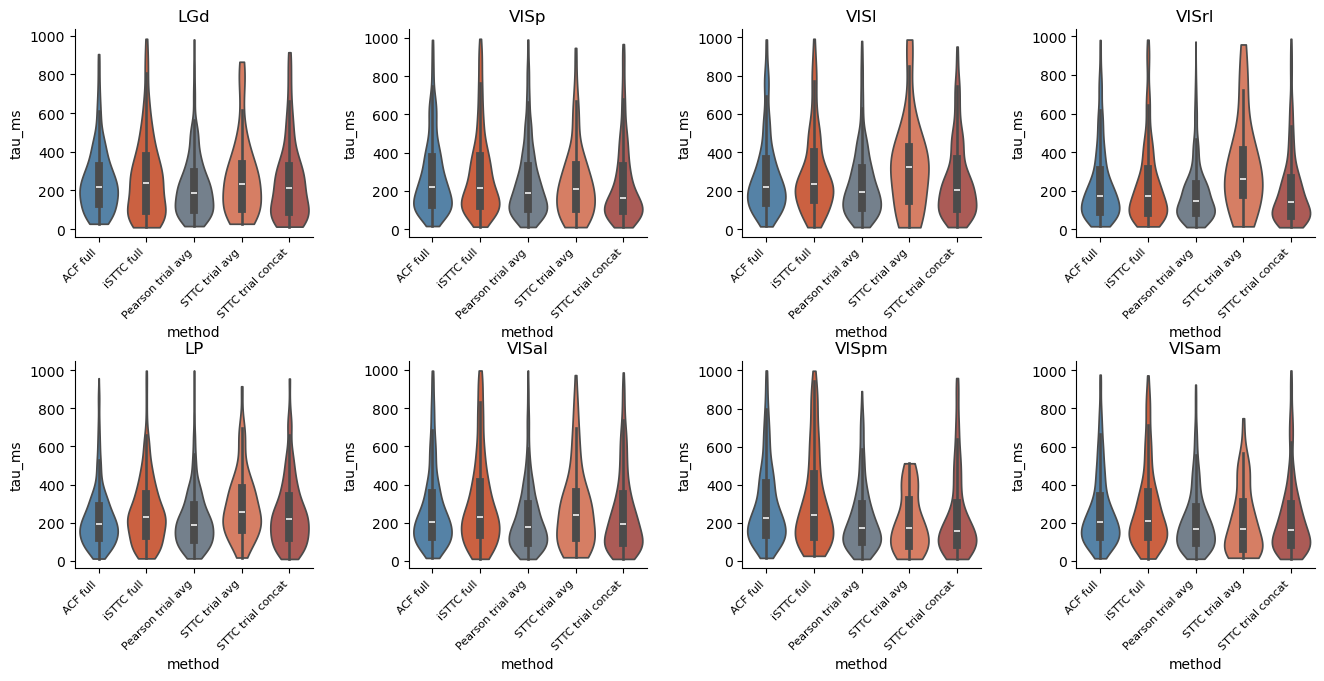

In [77]:
fig, axes = plt.subplots(2,4, figsize=(16, 7))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

for area_idx, area in enumerate(brain_areas_axes_ticks):
    y_idx = area_idx % 4 
    x_idx = area_idx // 4
    sns.violinplot(ax=axes[x_idx,y_idx], x='method', y='tau_ms', hue='method',
                   data=summary_df.query('tau_ms <= 1000 and tau_ms > 10 and ecephys_structure_acronym == @area'), 
                   cut=0,  density_norm='width', palette=colors)
    axes[x_idx,y_idx].set_title(area)

for ax in axes.flat:
    ax.set_xticks(['acf_full', 'isttc_full', 'pearsonr_trial_avg','sttc_trial_avg', 'sttc_trial_concat'])
    ax.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], 
                       rotation=45, ha='right', fontsize=8)

sns.despine()

<Axes: xlabel='method', ylabel='ecephys_structure_acronym'>

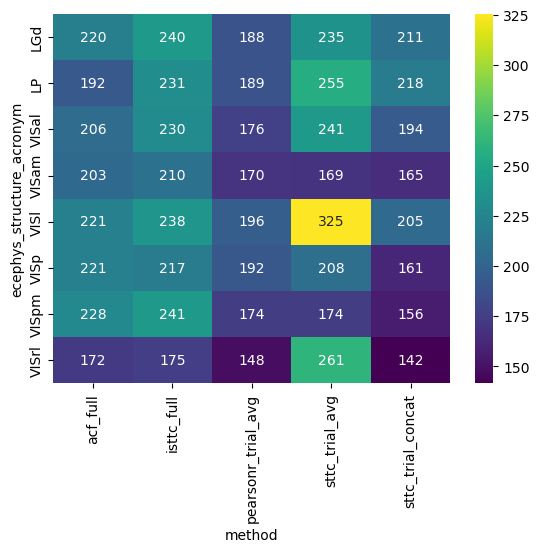

In [89]:
df_median = summary_df.query('tau_ms <= 1000 and tau_ms > 10').groupby(['ecephys_structure_acronym', 'method'])['tau_ms'].median().unstack()
annot_vals = df_median.round(0).astype(int)

sns.heatmap(df_median, annot=annot_vals, fmt="d", cmap="viridis")
#sns.heatmap(df_median, annot=True, cmap='viridis')

<Axes: xlabel='method', ylabel='ecephys_structure_acronym'>

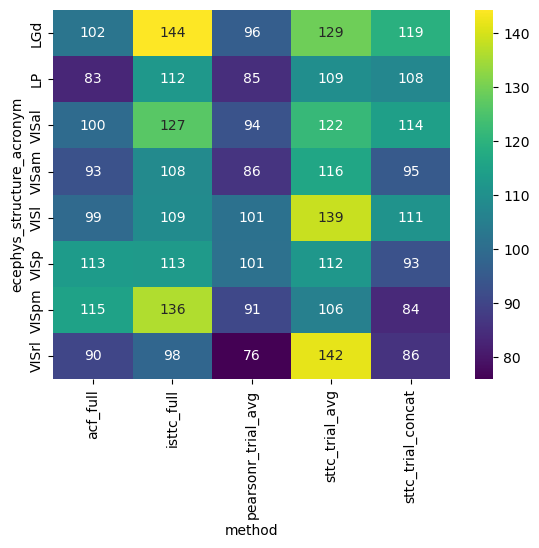

In [91]:
annot_vals = mad_df.round(0).astype(int)
sns.heatmap(mad_df, annot=annot_vals, fmt="d", cmap="viridis")

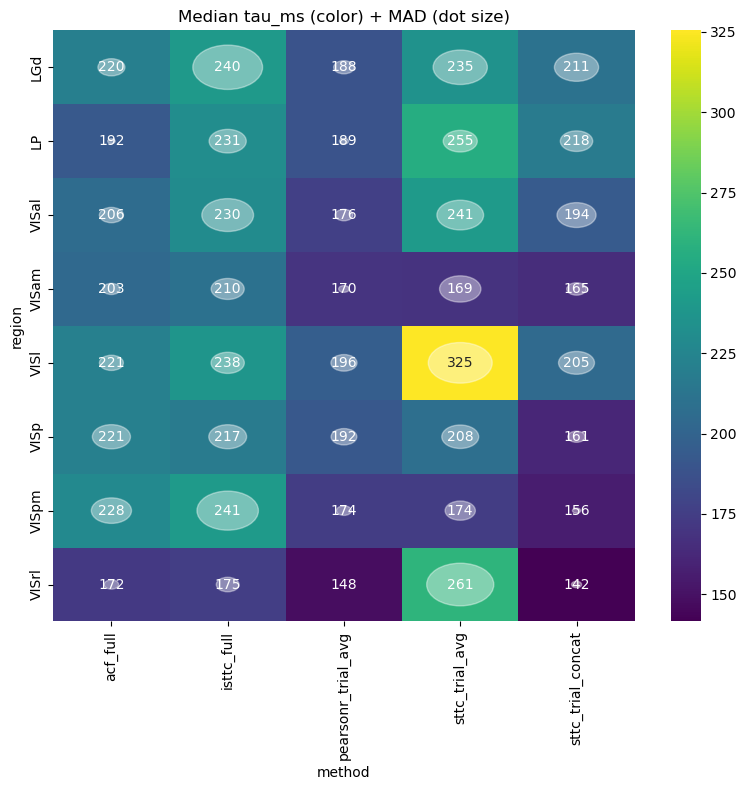

In [85]:
df = summary_df.query('tau_ms <= 1000 and tau_ms > 10')
# Step 1: Calculate median
median_df = df.groupby(['ecephys_structure_acronym', 'method'])['tau_ms'].median().unstack()

# Step 2: Calculate MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

mad_df = df.groupby(['ecephys_structure_acronym', 'method'])['tau_ms'].apply(mad).unstack()

# Step 3: Heatmap of medians
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(median_df, cmap='viridis', annot=median_df.round(0).astype(int), fmt='d', ax=ax, cbar=True)

# Step 4: Normalize MAD to [0,1] for dot sizing
norm_mad = (mad_df - mad_df.min().min()) / (mad_df.max().max() - mad_df.min().min())

# Overlay MAD as dot size
for i, region in enumerate(median_df.index):
    for j, method in enumerate(median_df.columns):
        spread = norm_mad.loc[region, method]
        radius = 0.3 * spread
        ax.add_patch(plt.Circle((j + 0.5, i + 0.5), radius, color='white', alpha=0.4))

plt.title('Median tau_ms (color) + MAD (dot size)')
plt.xlabel('method')
plt.ylabel('region')
plt.tight_layout()
plt.show()

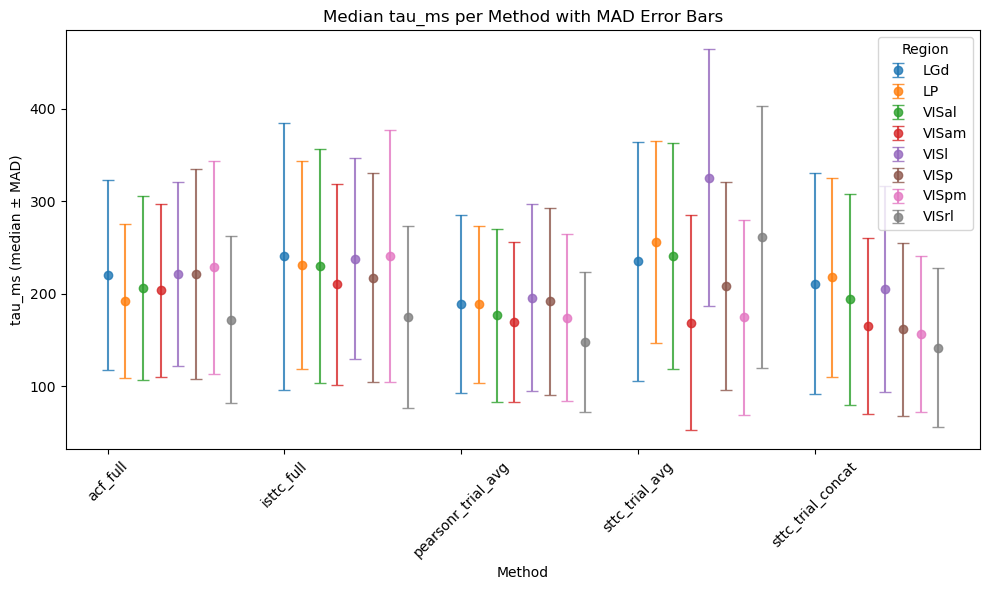

In [88]:
# Step 1: Aggregate median and MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

agg_df = df.groupby(['ecephys_structure_acronym', 'method'])['tau_ms'].agg(
    median='median',
    mad=mad
).reset_index()

# Step 2: Plot using matplotlib directly for error bars
plt.figure(figsize=(10, 6))

regions = agg_df['ecephys_structure_acronym'].unique()
colors = sns.color_palette("tab10", len(regions))

for i, region in enumerate(regions):
    region_data = agg_df[agg_df['ecephys_structure_acronym'] == region]
    
    # Sort methods for consistent plotting
    methods = region_data['method']
    x = np.arange(len(methods)) + i * 0.1  # offset to dodge points
    y = region_data['median']
    yerr = region_data['mad']
    
    plt.errorbar(
        x, y, yerr=yerr,
        fmt='o', capsize=4, label=region,
        color=colors[i], alpha=0.8
    )

# Tidy up x-axis
plt.xticks(np.arange(len(methods)), methods.unique(), rotation=45)
plt.ylabel("tau_ms (median ± MAD)")
plt.xlabel("Method")
plt.title("Median tau_ms per Method with MAD Error Bars")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

<Axes: xlabel='method', ylabel='tau_ms'>

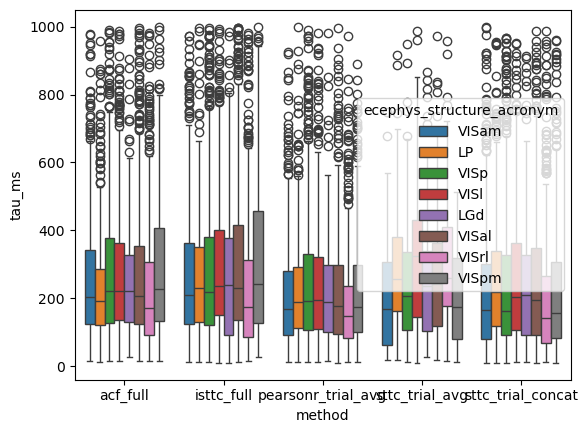

In [84]:
sns.boxplot(data=summary_df.query('tau_ms <= 1000 and tau_ms > 10'), x="method", y="tau_ms", hue="ecephys_structure_acronym", dodge=True)

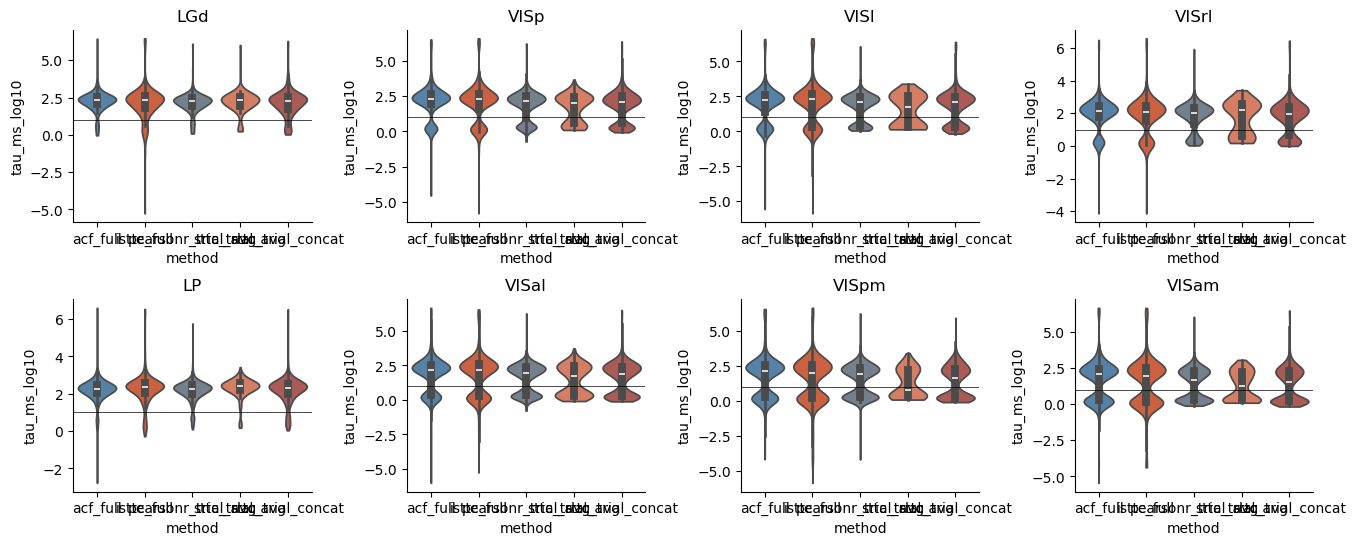

In [56]:
fig, axes = plt.subplots(2,4, figsize=(16, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for area_idx, area in enumerate(brain_areas_axes_ticks):
    y_idx = area_idx % 4 
    x_idx = area_idx // 4
    sns.violinplot(ax=axes[x_idx,y_idx], x='method', y='tau_ms_log10', hue='method',
                   data=summary_df.query('ecephys_structure_acronym == @area'), 
                   cut=0,  density_norm='width', palette=colors)
    axes[x_idx,y_idx].axhline(y=np.log10(10), lw=0.5, color='k')
    axes[x_idx,y_idx].set_title(area)

sns.despine()

##### Quality metrics

C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\237448364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=units_acf_decline_df, x='method', y='percentage', palette=colors)
C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\237448364.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], rotation=45, ha='right')


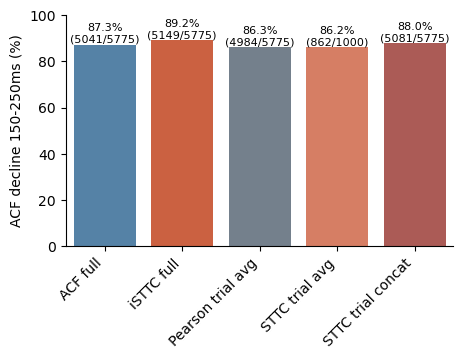

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))

sns.barplot(data=units_acf_decline_df, x='method', y='percentage', palette=colors)

axes.set_ylabel('ACF decline 150-250ms (%)')
axes.set_xlabel('')
axes.set_ylim(0, 100)  

axes.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], rotation=45, ha='right')
axes.set_xticks(['acf_full', 'isttc_full', 'pearsonr_trial_avg', 'sttc_trial_avg', 'sttc_trial_concat'])

for p, (true_count, total_count) in zip(axes.patches, zip(units_acf_decline_df['true_count'], units_acf_decline_df['total_count'])):
    percentage = p.get_height()
    axes.annotate(f'{percentage:.1f}%\n({true_count}/{total_count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black')

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'criteria2_all_units.png', bbox_inches='tight', dpi=300)
#     fig.savefig(fig_folder + 'criteria2_all_units.svg', bbox_inches='tight')

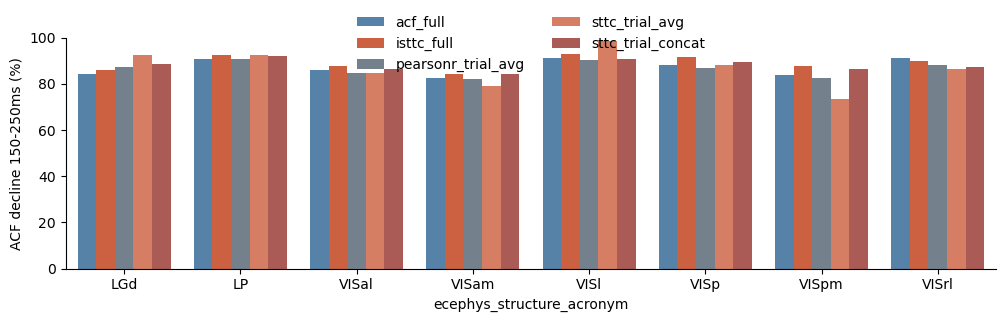

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(12, 3))

sns.barplot(data=units_acf_decline_per_area_df, x='ecephys_structure_acronym', y='percentage', hue='method', palette=colors)

axes.set_ylabel('ACF decline 150-250ms (%)')
# axes.set_xlabel('')
axes.set_ylim(0, 100)  
axes.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# axes.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], rotation=45, ha='right')
# axes.set_xticks(['acf_full', 'isttc_full', 'pearsonr_trial_avg', 'sttc_trial_avg', 'sttc_trial_concat'])

# for p, (true_count, total_count) in zip(axes.patches, zip(units_acf_decline_df['true_count'], units_acf_decline_df['total_count'])):
#     percentage = p.get_height()
#     axes.annotate(f'{percentage:.1f}%\n({true_count}/{total_count})', 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='bottom', fontsize=8, color='black')

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'criteria2_all_units.png', bbox_inches='tight', dpi=300)
#     fig.savefig(fig_folder + 'criteria2_all_units.svg', bbox_inches='tight')

C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2533611563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes, x='method', y='fit_r_squared', data=summary_df.query('decline_150_250 == True'),
C:\Users\ipochino\AppData\Local\Temp\ipykernel_1900\2533611563.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], rotation=45, ha='right')


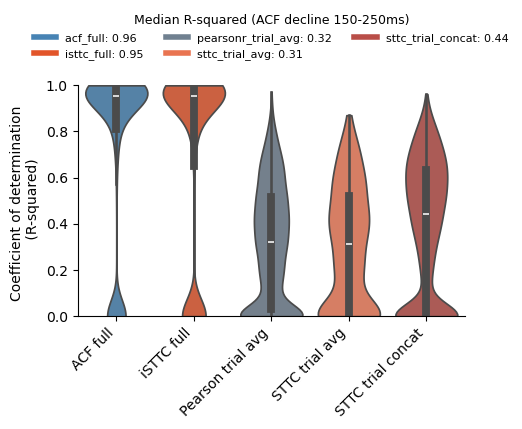

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))

sns.violinplot(ax=axes, x='method', y='fit_r_squared', data=summary_df.query('decline_150_250 == True'), 
               cut=0, density_norm='width', palette=colors)
axes.set_ylabel('Coefficient of determination \n (R-squared)')
axes.set_xlabel('')
axes.set_ylim(0, 1)  
axes.set_xticklabels(['ACF full', 'iSTTC full', 'Pearson trial avg', 'STTC trial avg', 'STTC trial concat'], rotation=45, ha='right')
axes.set_xticks(['acf_full', 'isttc_full', 'pearsonr_trial_avg', 'sttc_trial_avg', 'sttc_trial_concat'])

# Compute mean R-squared for each method
mean_r2 = summary_df.query('decline_150_250 == True').groupby('method')['fit_r_squared'].median()

# Create legend labels
legend_labels = [f"{method}: {mean_r2:.2f}" for method, mean_r2 in mean_r2.items()]

# Add legend on top
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend = axes.legend(handles, legend_labels, title="Median R-squared (ACF decline 150-250ms)", loc='upper center',
                     bbox_to_anchor=(0.5, 1.35), fontsize=8, title_fontsize=9, ncol=3, frameon=False)

sns.despine()

# if save_fig:
#     fig.savefig(fig_folder + 'rsquared_acf_decline_units.png', bbox_inches='tight', dpi=300)
#     fig.savefig(fig_folder + 'rsquared_acf_decline_units.svg', bbox_inches='tight')

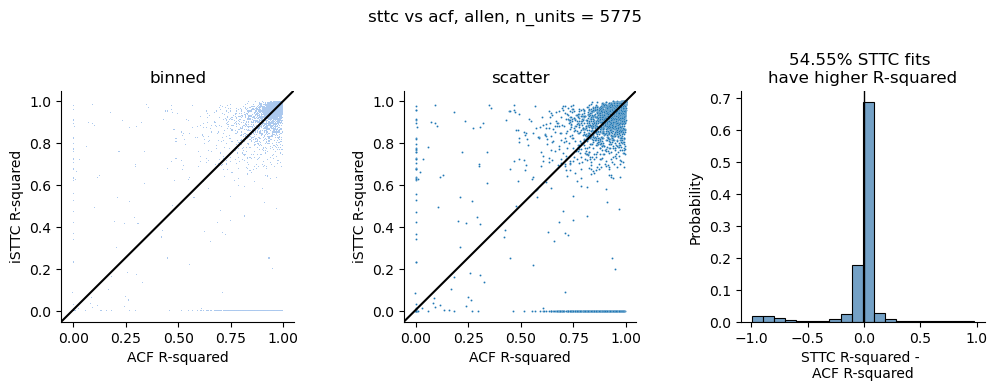

In [60]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=summary_df.query('method == "acf_full"')['fit_r_squared'].values, 
             y=summary_df.query('method == "isttc_full"')['fit_r_squared'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('ACF R-squared')
axes[0].set_ylabel('iSTTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=summary_df.query('method == "acf_full"')['fit_r_squared'].values, 
             y=summary_df.query('method == "isttc_full"')['fit_r_squared'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('ACF R-squared')
axes[1].set_ylabel('iSTTC R-squared')
axes[1].set_title('scatter')

r_squared_diff = summary_df.query('method == "isttc_full"')['fit_r_squared'].values - summary_df.query('method == "acf_full"')['fit_r_squared'].values
n_sttc_better = sum(r_squared_diff > 0)
n_sttc_better_perc = n_sttc_better / len(r_squared_diff) * 100

sns.histplot(ax=axes[2], x=r_squared_diff, stat='probability', bins=20, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nACF R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs acf, allen, n_units = ' + str(len(r_squared_diff)), y=1.15)

sns.despine()

#fig.savefig(isttc_results_folder_path + 'allen_sttc_vs_pearson.png' , bbox_inches='tight')